In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
import warnings
warnings.simplefilter("ignore")  # We wont get warning messages in output

In [135]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,16432,INN16433,3,0,2,3,Meal Plan 1,0,Room_Type 4,22,2018,4,14,Online,0,0,0,152.6,2,Not_Canceled
1,15128,INN15129,2,0,0,3,Meal Plan 1,0,Room_Type 1,193,2017,10,15,Offline,0,0,0,65.0,0,Canceled
2,16842,INN16843,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,101.5,0,Canceled
3,5488,INN05489,2,0,2,4,Meal Plan 1,0,Room_Type 4,7,2018,6,16,Online,0,0,0,156.0,1,Canceled
4,31896,INN31897,2,0,0,2,Meal Plan 2,0,Room_Type 1,39,2017,8,14,Offline,0,0,0,101.5,0,Not_Canceled


In [136]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [137]:
df.drop(columns = ["Unnamed: 0",'Booking_ID'], inplace=True)

In [138]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [139]:
df.shape

(29020, 18)

In [140]:
df.isnull().sum()   # Their are no null values in data frame

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [141]:
df.duplicated().sum() # Duplicated values

np.int64(7657)

In [142]:
df.drop_duplicates(inplace=True)

In [143]:
df.shape

(21363, 18)

In [144]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [145]:
df["market_segment_type"].value_counts()

market_segment_type
Online           16348
Offline           3487
Corporate         1175
Complementary      274
Aviation            79
Name: count, dtype: int64

In [146]:
df["no_of_children"].value_counts()

no_of_children
0     19297
1      1245
2       805
3        14
10        1
9         1
Name: count, dtype: int64

## Our data is inbalanced

In [147]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [148]:
len(cat_cols)

6

In [149]:
len(num_cols)

12

## DATA ANALYSIS

In [150]:
data = df.copy()

In [151]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,3,0,2,3,Meal Plan 1,0,Room_Type 4,22,2018,4,14,Online,0,0,0,152.6,2,Not_Canceled
1,2,0,0,3,Meal Plan 1,0,Room_Type 1,193,2017,10,15,Offline,0,0,0,65.0,0,Canceled
2,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,101.5,0,Canceled
3,2,0,2,4,Meal Plan 1,0,Room_Type 4,7,2018,6,16,Online,0,0,0,156.0,1,Canceled
4,2,0,0,2,Meal Plan 2,0,Room_Type 1,39,2017,8,14,Offline,0,0,0,101.5,0,Not_Canceled


##### UNIVARIATE ANALYSIS

In [152]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize = (15, len(num_features)*5))
    if len(num_features) == 1:
        axes = [axes]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x = column, ax = axes[i][0], kde= True, palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data = df, x = column, ax = axes[i][1], palette = "Blues")
        axes[i][1].set_title(f"Box plot for {column}")

    plt.tight_layout()
    plt.show()

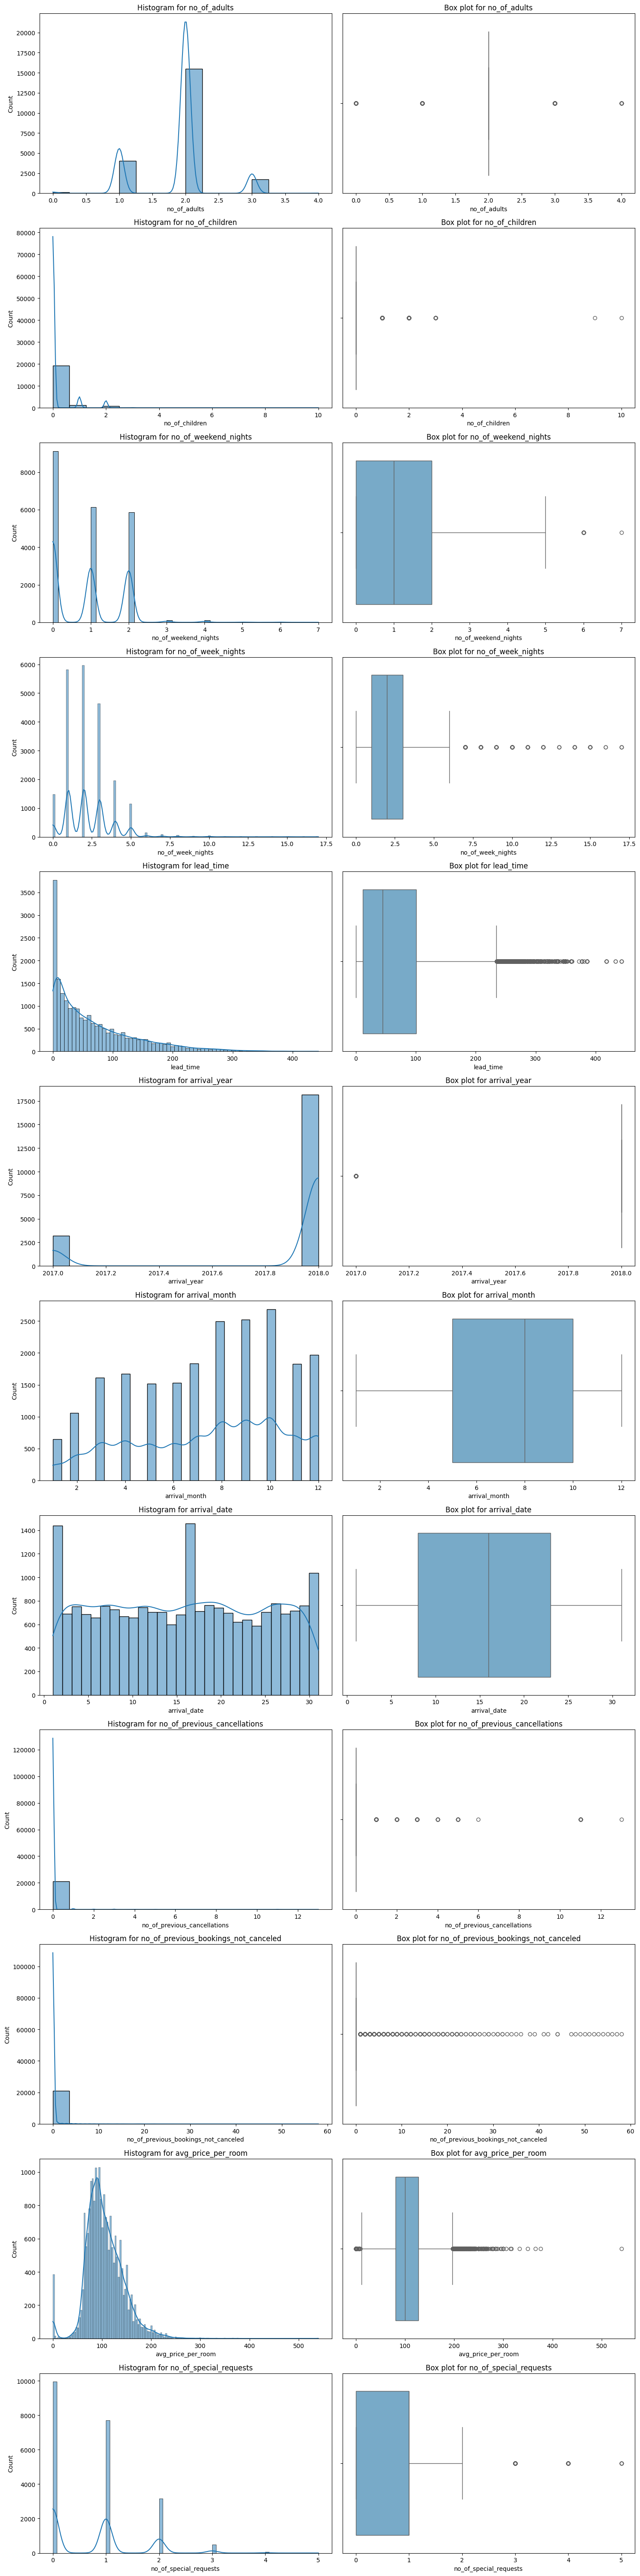

In [153]:
num_plot_dist(data, num_cols)

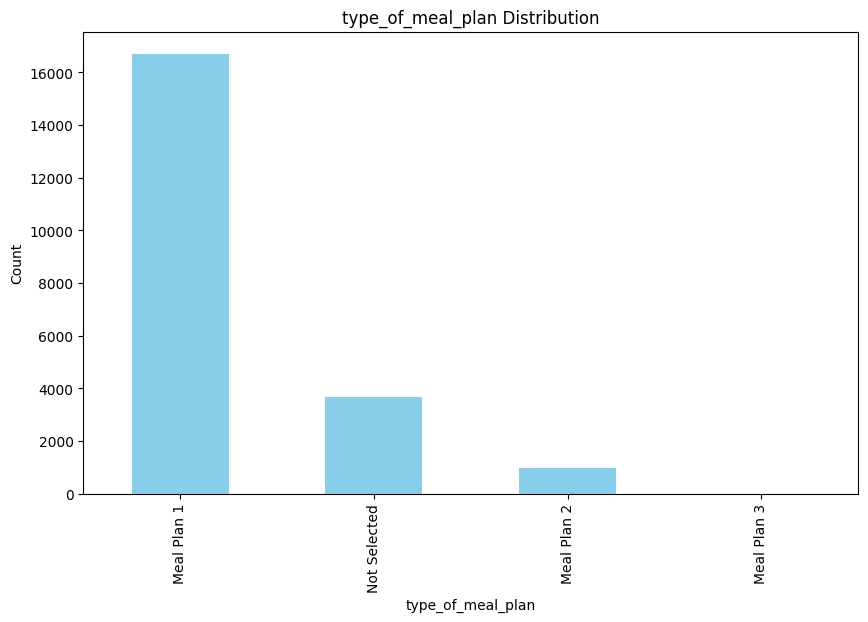

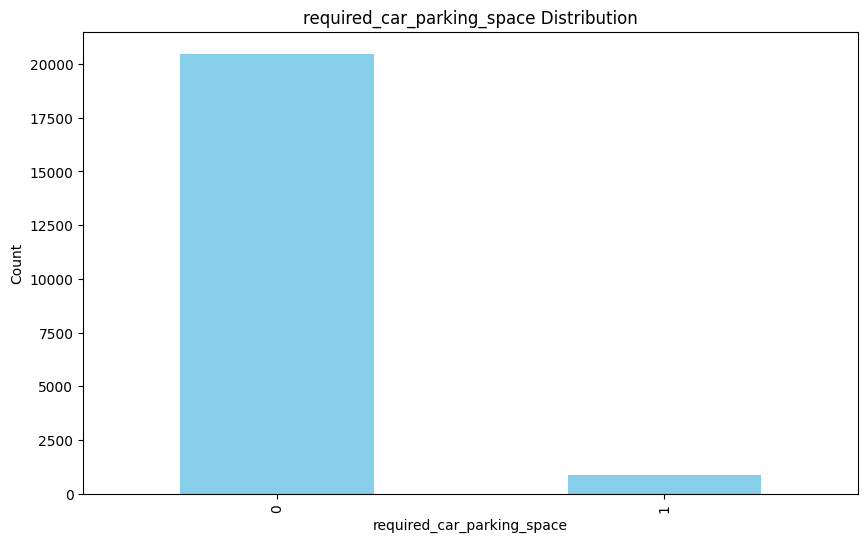

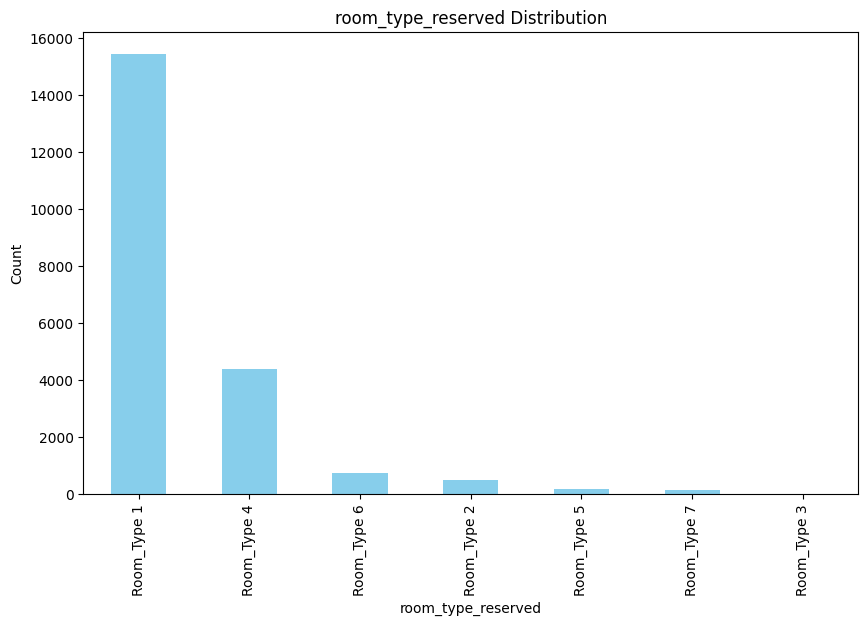

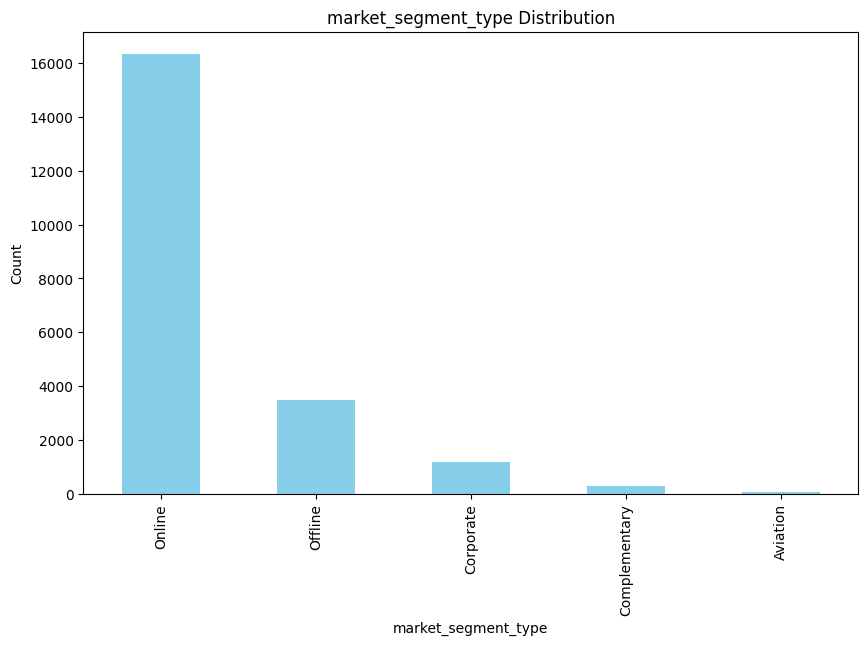

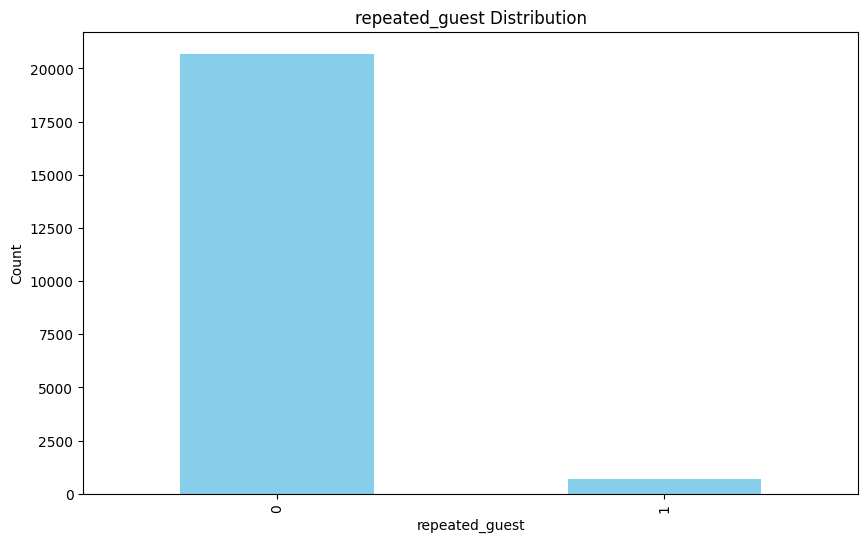

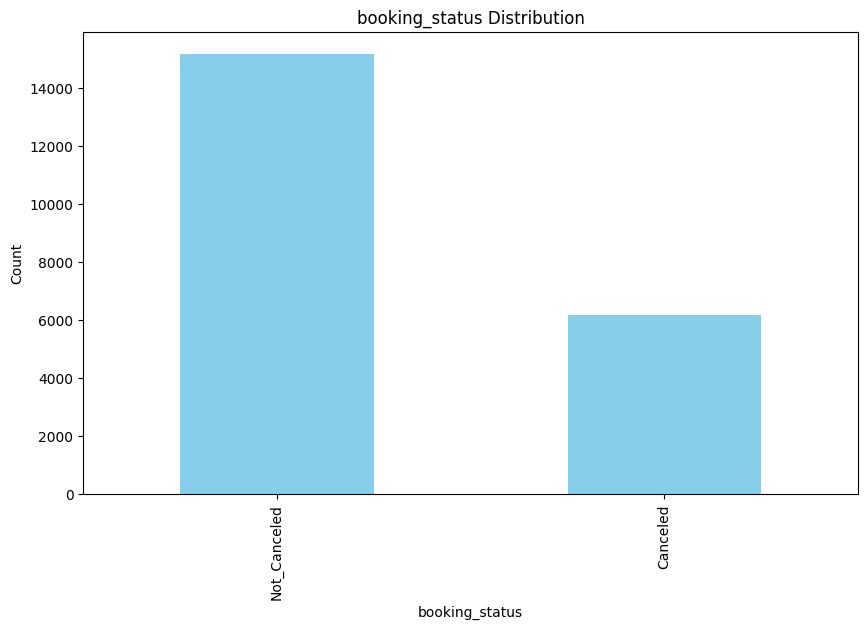

In [154]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10, 6))
    data[cat_feature].value_counts().plot(kind='bar' , color = 'skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

### Bivaraite Analysis

In [155]:
def plot_bivariate_num(df, target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2  # we do "//" so a decimal number dosent come, an integer value comes
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x= target, y= column, ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f"{column} VS {target}")

    plt.tight_layout()
    plt.show()

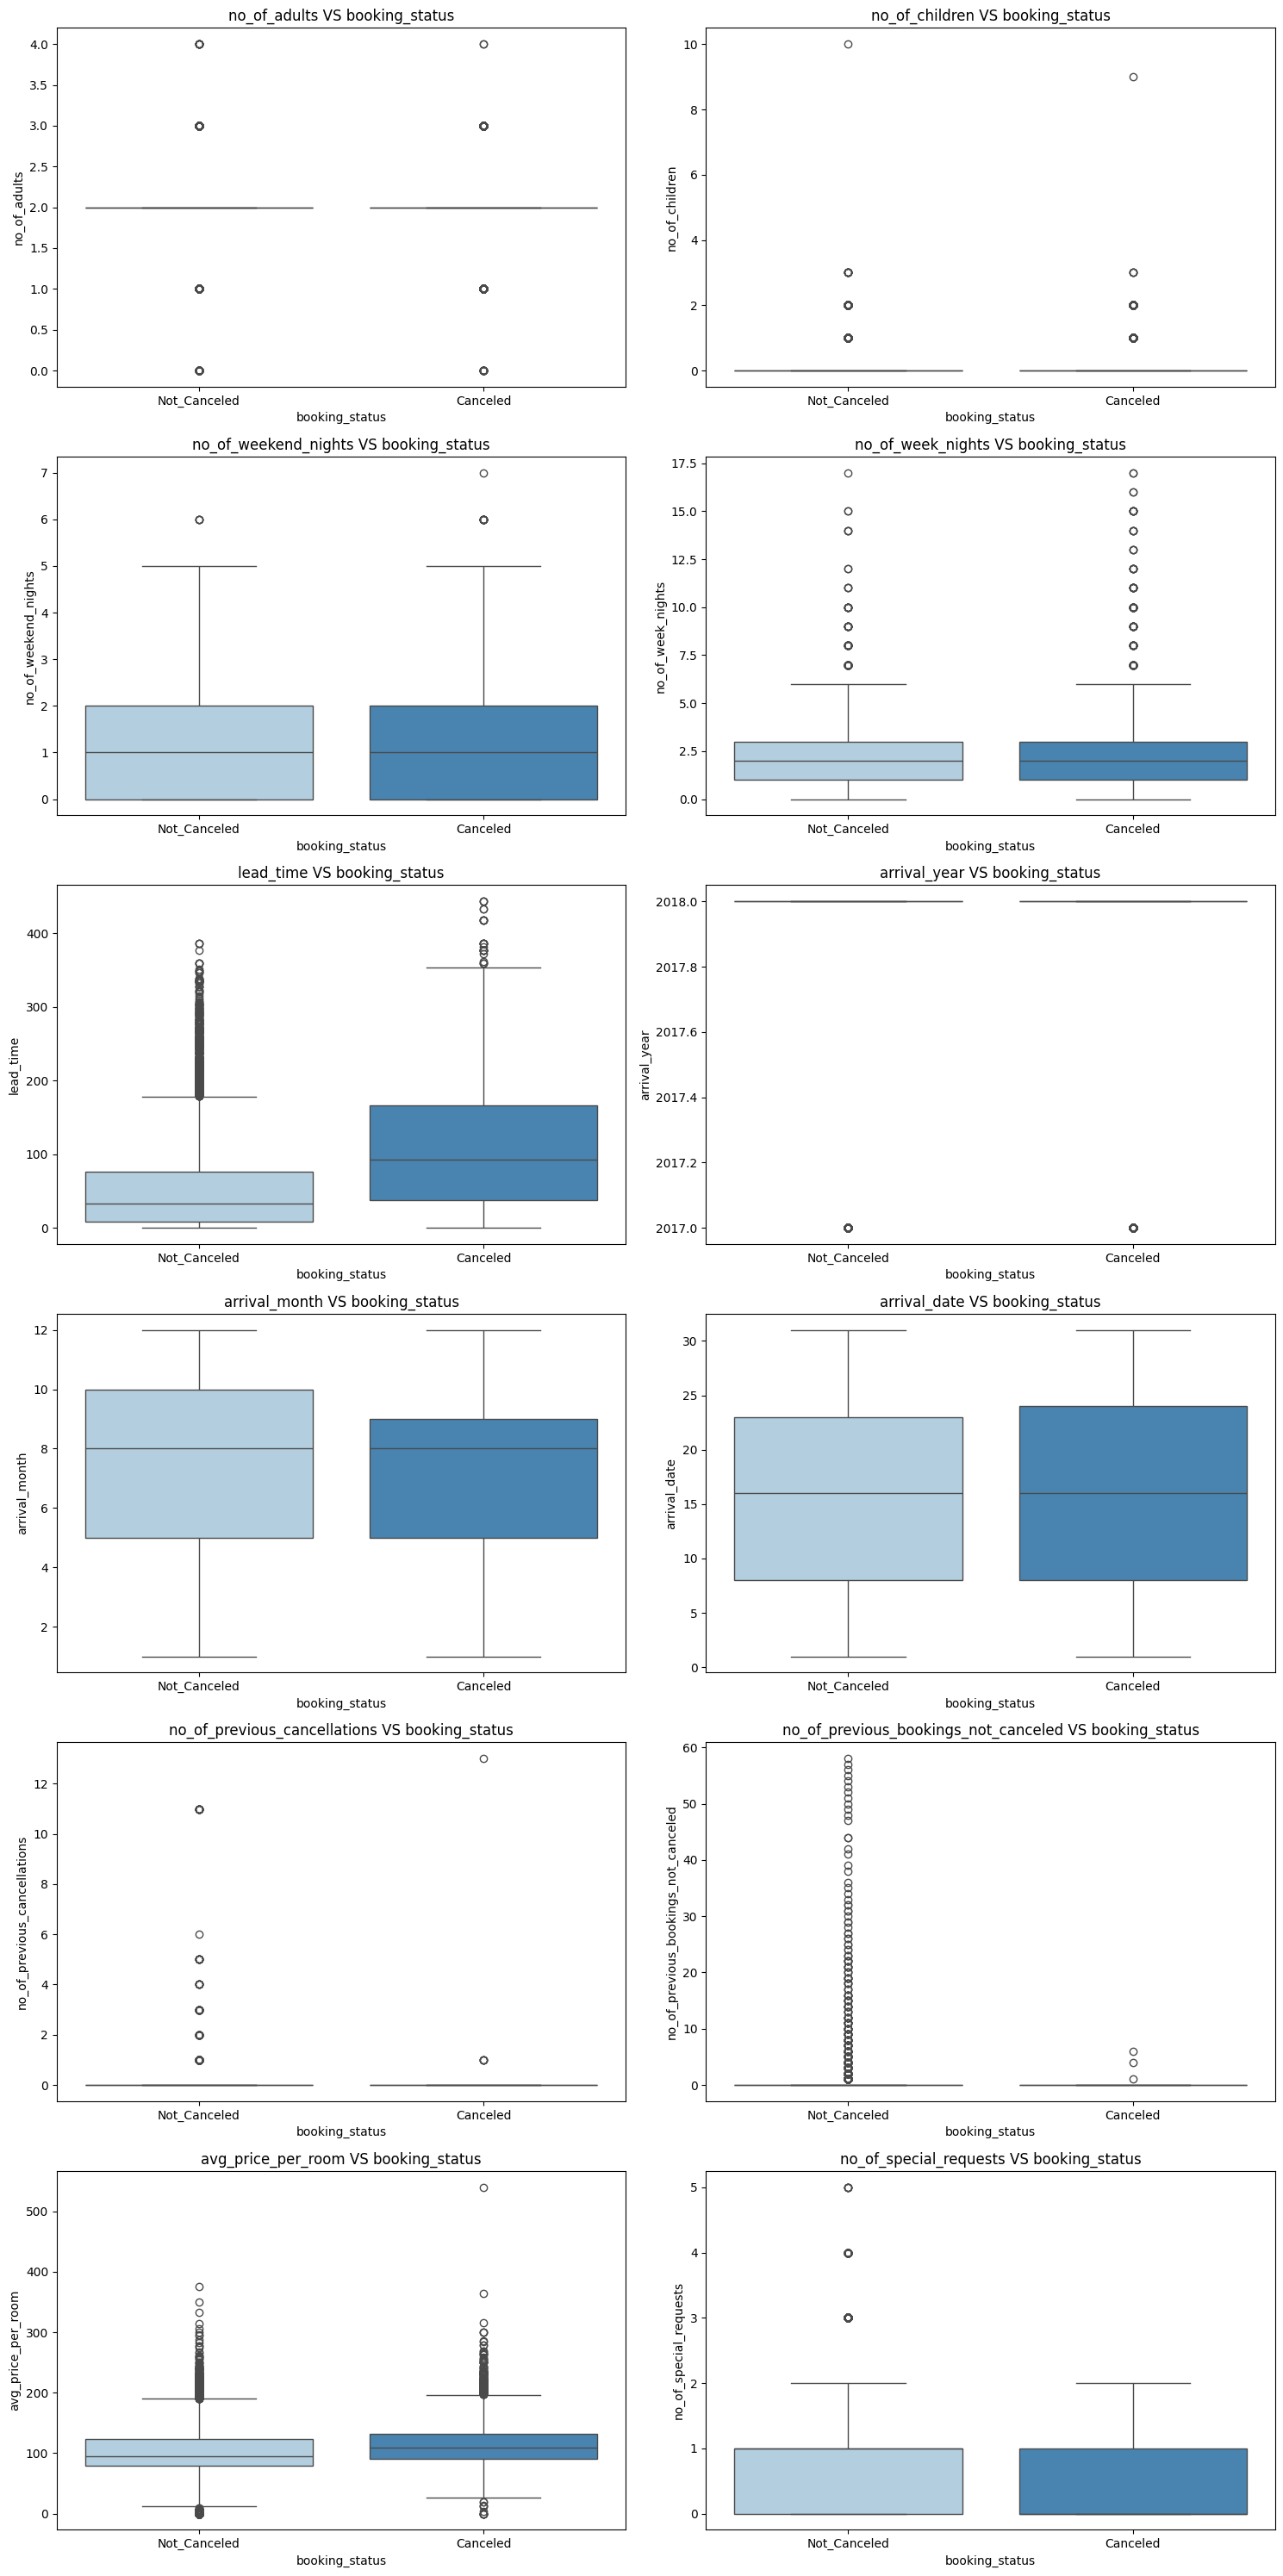

In [156]:
plot_bivariate_num(data, 'booking_status' , num_cols)

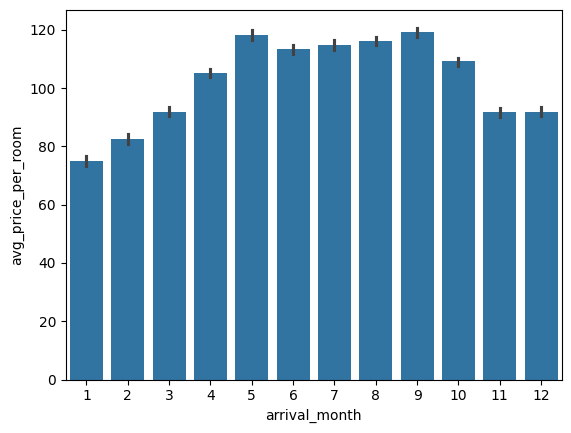

In [157]:
sns.barplot(x = 'arrival_month', y = "avg_price_per_room", data = df)
plt.show()

In [158]:
def plot_bivariate_cat(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x = feature, hue= target, data = df, palette="Set2", ax = axes[i])   # Famous graph for plotting categorical features
        # We use hue because sns.countplot() is used in univariate analysis, to use it for bivariate analysis we use hue
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()



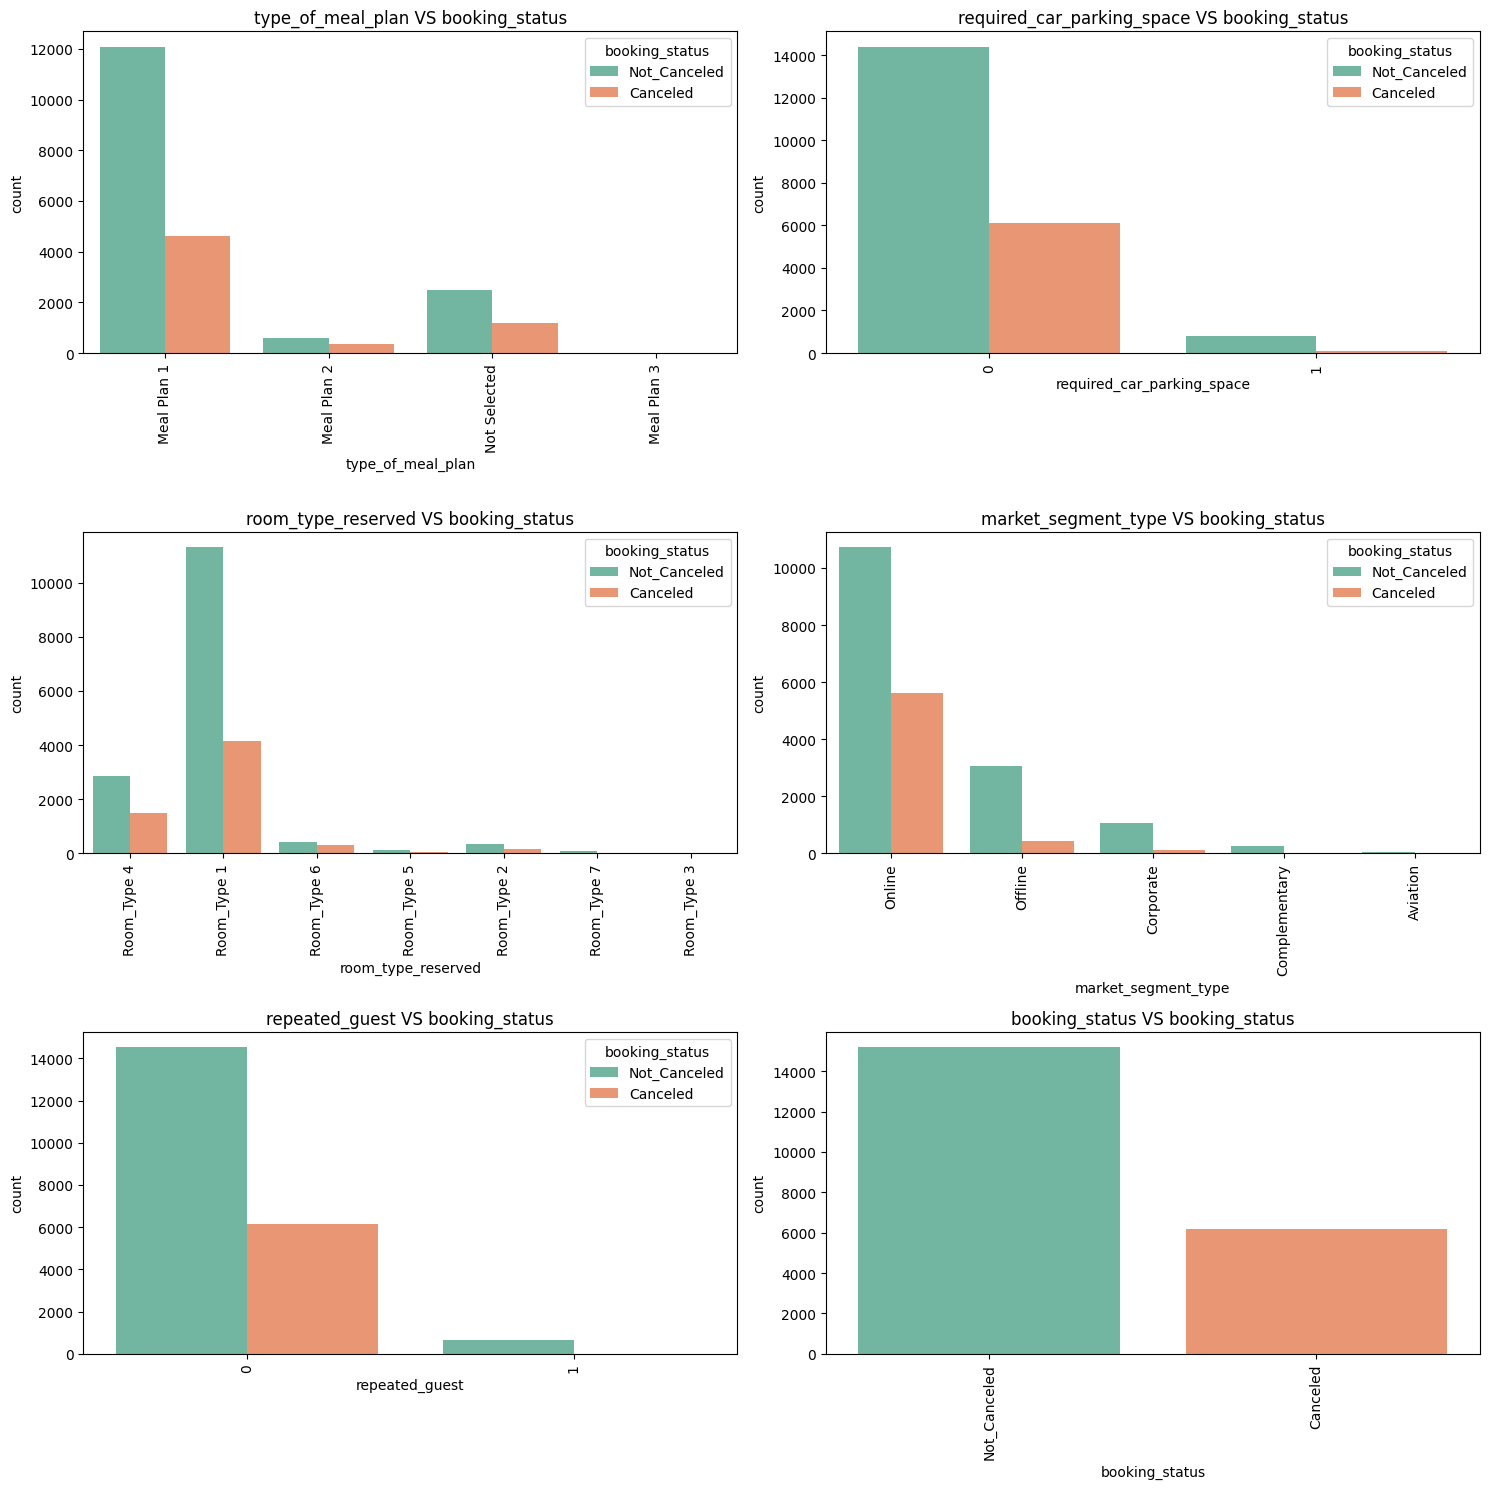

In [159]:
plot_bivariate_cat(data, 'booking_status', cat_cols)

### DATA PROCESSING

In [160]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,3,0,2,3,Meal Plan 1,0,Room_Type 4,22,2018,4,14,Online,0,0,0,152.6,2,Not_Canceled
1,2,0,0,3,Meal Plan 1,0,Room_Type 1,193,2017,10,15,Offline,0,0,0,65.0,0,Canceled
2,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,101.5,0,Canceled
3,2,0,2,4,Meal Plan 1,0,Room_Type 4,7,2018,6,16,Online,0,0,0,156.0,1,Canceled
4,2,0,0,2,Meal Plan 2,0,Room_Type 1,39,2017,8,14,Offline,0,0,0,101.5,0,Not_Canceled


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21363 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21363 non-null  int64  
 1   no_of_children                        21363 non-null  int64  
 2   no_of_weekend_nights                  21363 non-null  int64  
 3   no_of_week_nights                     21363 non-null  int64  
 4   type_of_meal_plan                     21363 non-null  object 
 5   required_car_parking_space            21363 non-null  int64  
 6   room_type_reserved                    21363 non-null  object 
 7   lead_time                             21363 non-null  int64  
 8   arrival_year                          21363 non-null  int64  
 9   arrival_month                         21363 non-null  int64  
 10  arrival_date                          21363 non-null  int64  
 11  market_segment_type 

In [ ]:
# LABEL ENCODING
from sklearn.preprocessing import LabelEncoder


In [163]:
label_encoder = LabelEncoder()

mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
    mappings[col] = {label:code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}


In [164]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [165]:
df.head()
    

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,3,0,2,3,0,0,3,22,2018,4,14,4,0,0,0,152.6,2,1
1,2,0,0,3,0,0,0,193,2017,10,15,3,0,0,0,65.0,0,0
2,2,0,0,2,1,0,0,257,2017,7,1,3,0,0,0,101.5,0,0
3,2,0,2,4,0,0,3,7,2018,6,16,4,0,0,0,156.0,1,0
4,2,0,0,2,1,0,0,39,2017,8,14,3,0,0,0,101.5,0,1


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21363 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21363 non-null  int64  
 1   no_of_children                        21363 non-null  int64  
 2   no_of_weekend_nights                  21363 non-null  int64  
 3   no_of_week_nights                     21363 non-null  int64  
 4   type_of_meal_plan                     21363 non-null  int64  
 5   required_car_parking_space            21363 non-null  int64  
 6   room_type_reserved                    21363 non-null  int64  
 7   lead_time                             21363 non-null  int64  
 8   arrival_year                          21363 non-null  int64  
 9   arrival_month                         21363 non-null  int64  
 10  arrival_date                          21363 non-null  int64  
 11  market_segment_type 

#### We also need to check multicollinearity, it arises when our input features are correlated with each other, this is not suitable for training our model.

In [167]:
!pip install statsmodels


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [168]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# The variance_inflation_factor detects if their is multicolinearity or not

from statsmodels.tools.tools import add_constant

In [169]:
X = add_constant(df)

# Now we will calculate VIF factor for each feature in dataframe

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [170]:
vif_data
# If our data has VIF above 5 then we have mutlicollinearity, if its around 10 then very high mutlicollinearity but if its around 1 or 2 or 3 then its low mutlicollinearity
# Our data dosent have any mutlicollinearity

,feature,VIF
0,const,4.130629e+07
1,no_of_adults,1.332786e+00
2,no_of_children,1.277363e+00
3,no_of_weekend_nights,1.077737e+00
4,no_of_week_nights,1.129868e+00
5,type_of_meal_plan,1.180420e+00
6,required_car_parking_space,1.030544e+00
7,room_type_reserved,1.552154e+00
8,lead_time,1.403929e+00
9,arrival_year,1.288580e+00


In [171]:
corr = df.corr()
# WE will make a correlation matrix for our dataset

In [172]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.041020,0.089485,0.109158,-0.004399,0.003443,0.277140,0.152501,0.094531,0.013961,0.024433,0.308521,-0.235450,-0.066456,-0.140567,0.326021,0.155097,-0.096847
no_of_children,-0.041020,1.000000,0.003934,0.013091,-0.106357,0.019474,0.355924,0.009775,0.035826,0.000533,0.030225,0.098727,-0.047705,-0.020320,-0.027908,0.349600,0.101932,-0.061348
no_of_weekend_nights,0.089485,0.003934,1.000000,0.235966,-0.035220,-0.049119,0.024306,0.128930,0.030998,0.014258,0.006304,0.090665,-0.088718,-0.028774,-0.037702,-0.006200,0.008986,-0.070933
no_of_week_nights,0.109158,0.013091,0.235966,1.000000,-0.078042,-0.060775,0.083381,0.216329,0.014425,0.028261,-0.003231,0.110758,-0.117469,-0.034039,-0.057415,0.007542,0.028302,-0.119932
type_of_meal_plan,-0.004399,-0.106357,-0.035220,-0.078042,1.000000,-0.022500,-0.248583,-0.050353,0.096004,0.012995,-0.011660,0.182865,-0.068908,-0.011928,-0.043590,-0.105087,-0.011096,-0.040612
required_car_parking_space,0.003443,0.019474,-0.049119,-0.060775,-0.022500,1.000000,0.015630,-0.039373,-0.000757,-0.008021,-0.000630,-0.031052,0.093630,0.017049,0.048272,0.063159,0.073167,0.085228
room_type_reserved,0.277140,0.355924,0.024306,0.083381,-0.248583,0.015630,1.000000,-0.015373,0.085693,0.003816,0.033250,0.091101,-0.044222,-0.016809,-0.020229,0.489427,0.087370,-0.076845
lead_time,0.152501,0.009775,0.128930,0.216329,-0.050353,-0.039373,-0.015373,1.000000,0.169001,0.134771,0.035916,0.136460,-0.145523,-0.051480,-0.083499,-0.046512,-0.012252,-0.371249
arrival_year,0.094531,0.035826,0.030998,0.014425,0.096004,-0.000757,0.085693,0.169001,1.000000,-0.320542,0.015051,0.105281,-0.005356,0.012159,0.025382,0.175269,-0.004573,-0.156544
arrival_month,0.013961,0.000533,0.014258,0.028261,0.012995,-0.008021,0.003816,0.134771,-0.320542,1.000000,-0.025113,-0.011054,-0.009454,-0.044544,-0.009286,0.066250,0.140126,0.012149


<Axes: >

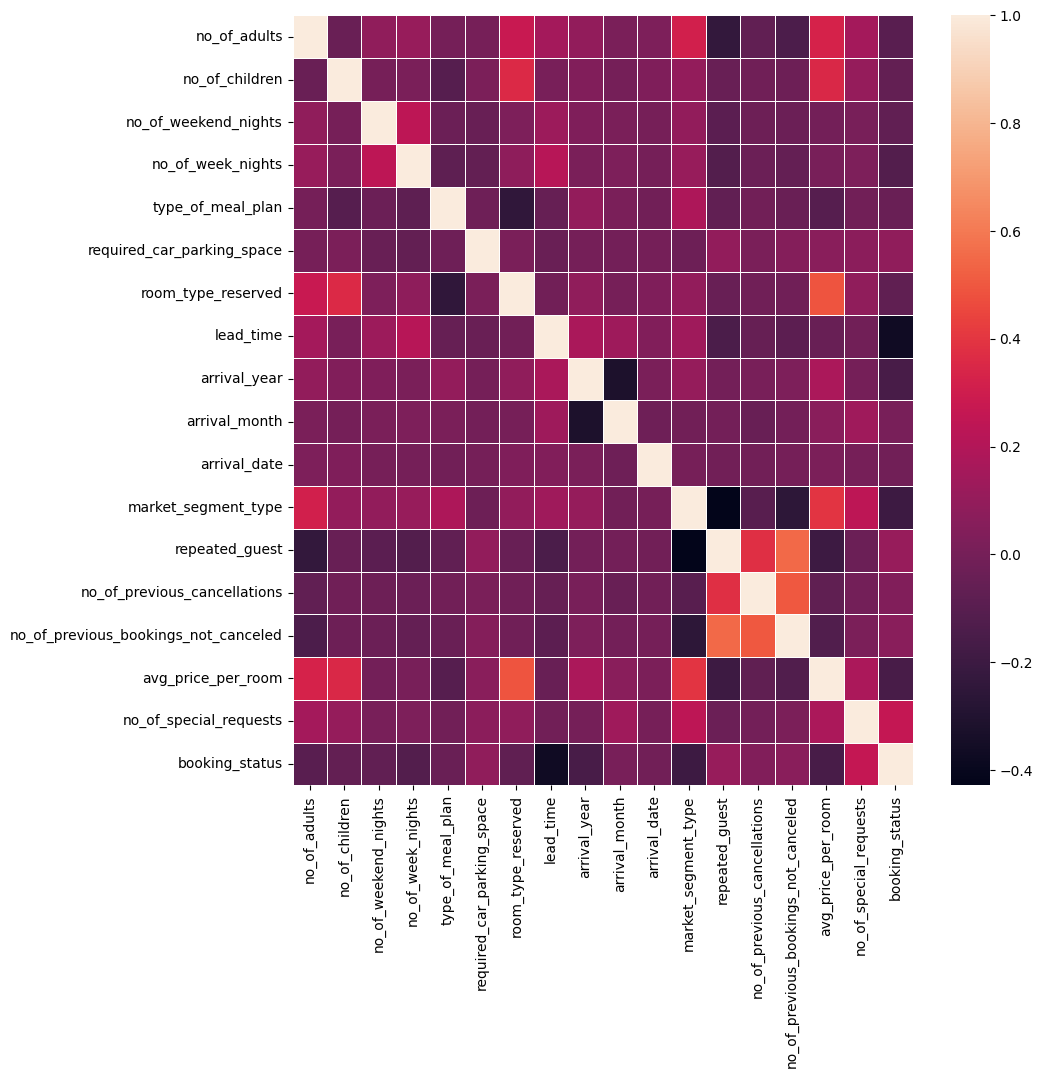

In [173]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, linewidth = 0.5)
# sns.heatmap(corr, annot = True, linewidth = 0.5)
# The lighter colours show that 2 paramteres that are positively correlated , darker ones show that they are negatively correlated

In [174]:
#### We also check for skewness
skewness = df.skew()

In [175]:
skewness
# The columns that hhave high value, are skewed and they need to be fixed

no_of_adults                            -0.296230
no_of_children                           4.015380
no_of_weekend_nights                     0.678744
no_of_week_nights                        1.682357
type_of_meal_plan                        1.631275
required_car_parking_space               4.608661
room_type_reserved                       1.404670
lead_time                                1.414304
arrival_year                            -1.967980
arrival_month                           -0.302415
arrival_date                             0.011855
market_segment_type                     -2.340650
repeated_guest                           5.382298
no_of_previous_cancellations            22.668333
no_of_previous_bookings_not_canceled    17.158855
avg_price_per_room                       0.628724
no_of_special_requests                   0.914926
booking_status                          -0.930243
dtype: float64

In [176]:
# There are techniques for handling with skewness, but in this case we now use lock transformation

In [177]:
for col in df.columns:
    if skewness[col] > 5:
      df[col] = np.log1p(df[col])
      # we do log transformation on that certain column

In [178]:
skewness_fixed = df.skew()
skewness_fixed

no_of_adults                            -0.296230
no_of_children                           4.015380
no_of_weekend_nights                     0.678744
no_of_week_nights                        1.682357
type_of_meal_plan                        1.631275
required_car_parking_space               4.608661
room_type_reserved                       1.404670
lead_time                                1.414304
arrival_year                            -1.967980
arrival_month                           -0.302415
arrival_date                             0.011855
market_segment_type                     -2.340650
repeated_guest                           5.382298
no_of_previous_cancellations            13.575327
no_of_previous_bookings_not_canceled     7.796928
avg_price_per_room                       0.628724
no_of_special_requests                   0.914926
booking_status                          -0.930243
dtype: float64

In [179]:
df["booking_status"].value_counts()

booking_status
1    15186
0     6177
Name: count, dtype: int64

In [180]:
# we cant do undersampling because our data will get reduced drastically, we will use oversampling
X = df.drop(columns = 'booking_status')
y = df["booking_status"]

In [181]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [182]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [183]:
y.value_counts()

booking_status
1    15186
0     6177
Name: count, dtype: int64

In [184]:
from imblearn.over_sampling import SMOTE

In [185]:
smote = SMOTE(random_state=42)

X_res , y_res = smote.fit_resample(X, y)

In [186]:
# We cant see the y res value counts, we will convert it into series first because we cant directly see the series
pd.Series(y_res)

0        1
1        0
2        0
3        0
4        1
        ..
30367    0
30368    0
30369    0
30370    0
30371    0
Name: booking_status, Length: 30372, dtype: int64

In [187]:
y_res.value_counts()
# It is in the series format only

# Now we have around 30,000 total data, now we will create a new dataframe by using these values

booking_status
1    15186
0    15186
Name: count, dtype: int64

In [188]:
df.shape

(21363, 18)

In [189]:
balanced_df = pd.DataFrame(X_res, columns = X.columns)
balanced_df["booking_status"] = y_res

In [190]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,3,0,2,3,0,0,3,22,2018,4,14,4,0.0,0.0,0.0,152.6,2,1
1,2,0,0,3,0,0,0,193,2017,10,15,3,0.0,0.0,0.0,65.0,0,0
2,2,0,0,2,1,0,0,257,2017,7,1,3,0.0,0.0,0.0,101.5,0,0
3,2,0,2,4,0,0,3,7,2018,6,16,4,0.0,0.0,0.0,156.0,1,0
4,2,0,0,2,1,0,0,39,2017,8,14,3,0.0,0.0,0.0,101.5,0,1


In [191]:
balanced_df.shape

(30372, 18)

In [192]:
df = balanced_df.copy()

In [193]:
df.shape

(30372, 18)

In [194]:
#### Feature selection 

In [195]:
len(df.columns)
# we have 18 input columns, out of which 1 is target column

18

In [196]:
# we will be selecting top 10 columns for our training purpose, cause supose if we are getting 90% accuracy with 17 columns and the same 90% accuracy with 10 columns then their is no need for the extra 7 columns

In [197]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
X = df.drop(columns = 'booking_status')
y = df["booking_status"]

In [199]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [200]:
model.feature_importances_

array([1.76269966e-02, 7.06138607e-03, 2.94605883e-02, 4.42373655e-02,
       2.10714012e-02, 1.14690945e-02, 2.00097303e-02, 2.65908314e-01,
       1.71149177e-02, 8.51115131e-02, 8.16589260e-02, 5.89690772e-02,
       5.88463000e-03, 2.45981387e-04, 2.63730036e-03, 1.47682022e-01,
       1.83850755e-01])

In [201]:
feature_importance = model.feature_importances_

In [202]:
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
})

In [203]:
feature_importance_df

,feature,importance
0,no_of_adults,0.017627
1,no_of_children,0.007061
2,no_of_weekend_nights,0.029461
3,no_of_week_nights,0.044237
4,type_of_meal_plan,0.021071
5,required_car_parking_space,0.011469
6,room_type_reserved,0.020010
7,lead_time,0.265908
8,arrival_year,0.017115
9,arrival_month,0.085112


In [204]:
top_features_importance_df  = feature_importance_df.sort_values(by = "importance", ascending= False)

In [205]:
top_features_importance_df

,feature,importance
7,lead_time,0.265908
16,no_of_special_requests,0.183851
15,avg_price_per_room,0.147682
9,arrival_month,0.085112
10,arrival_date,0.081659
11,market_segment_type,0.058969
3,no_of_week_nights,0.044237
2,no_of_weekend_nights,0.029461
4,type_of_meal_plan,0.021071
6,room_type_reserved,0.020010


In [206]:
len(df.columns)

18

In [207]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [208]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,22,2,152.6,4,14,4,3,2,0,3,1
1,193,0,65.0,10,15,3,3,0,0,0,0
2,257,0,101.5,7,1,3,2,0,1,0,0
3,7,1,156.0,6,16,4,4,2,0,3,0
4,39,0,101.5,8,14,3,2,0,1,0,1


In [209]:
len(top_10_df.columns)

11

In [210]:
df = top_10_df.copy()

## Model selection
#### We will be selecting many models and using them in order to check which has highest accuracy

In [211]:
!pip install xgboost lightgbm


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [212]:
# We are using all classification models because it is a classification problem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Precision matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [213]:
X = df.drop(columns = 'booking_status')
y = df["booking_status"]

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [215]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support vector classifier": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(random_state = 42),
    "ADAboost": AdaBoostClassifier(random_state=42),
    "LGBM": LGBMClassifier(random_state=42)
}

In [216]:
metrics = {

    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 score": []
}

In [217]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 score"].append(f1)


In [218]:
metrics_df = pd.DataFrame(metrics)

In [219]:
metrics

{'Model': ['Random Forest',
  'LogisticRegression',
  'Gradient Boosting',
  'Support vector classifier',
  'Decision Tree',
  'KNN',
  'Naive Bayes',
  'XGBoost',
  'ADAboost',
  'LGBM'],
 'Accuracy': [0.8872427983539095,
  0.7716872427983539,
  0.8381893004115226,
  0.725925925925926,
  0.8265020576131688,
  0.7830452674897119,
  0.7748148148148148,
  0.8716049382716049,
  0.8,
  0.8661728395061729],
 'Precision': [0.8901062416998672,
  0.8011695906432749,
  0.8269598470363289,
  0.7278775781769794,
  0.8342895713803578,
  0.8397309062129007,
  0.8047531992687386,
  0.8638270409809616,
  0.8074324324324325,
  0.8540471637985978],
 'Recall': [0.8833607907742999,
  0.7222405271828666,
  0.8550247116968699,
  0.7209225700164744,
  0.814497528830313,
  0.6991762767710049,
  0.7252059308072487,
  0.8820428336079077,
  0.7874794069192751,
  0.8830313014827018],
 'F1 score': [0.8867206879444353,
  0.7596603708196153,
  0.8407581402883525,
  0.7243833802350604,
  0.8242747582527509,
  0.7630

In [220]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 score
0,Random Forest,0.887243,0.890106,0.883361,0.886721
1,LogisticRegression,0.771687,0.801170,0.722241,0.759660
2,Gradient Boosting,0.838189,0.826960,0.855025,0.840758
3,Support vector classifier,0.725926,0.727878,0.720923,0.724383
4,Decision Tree,0.826502,0.834290,0.814498,0.824275
5,KNN,0.783045,0.839731,0.699176,0.763035
6,Naive Bayes,0.774815,0.804753,0.725206,0.762912
7,XGBoost,0.871605,0.863827,0.882043,0.872840
8,ADAboost,0.800000,0.807432,0.787479,0.797331
9,LGBM,0.866173,0.854047,0.883031,0.868297


In [221]:
##### Train our RF model

In [222]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [223]:
X = df.drop(columns = 'booking_status')
y = df["booking_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [224]:
rf = RandomForestClassifier(random_state=42)

In [228]:
params_dist = {
    'n_estimators' : randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
    }

In [230]:
random_search = RandomizedSearchCV(
    estimator= rf,
    param_distributions=params_dist,
    n_iter= 5, # we want a fastrun so 5
    cv = 5,
    verbose= 2,
    random_state= 42,
    scoring= 'accuracy'
)

In [231]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.5s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.4s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002BA3FD46810>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002BA402ABD10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002BA40678290>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002BA3FC7AA20>},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
random_search.best_params_

# To store our best model
best_rf_model = random_search.best_estimator_ # best_estimator_ gives you the model with these 'random_search.best_params_' parameters
y_pred = best_rf_model.predict(X_test)

In [257]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [258]:
accuracy

0.8851028806584362

In [235]:
precision

0.8850082372322899

In [236]:
recall

0.8850082372322899

In [237]:
f1

0.8850082372322899

In [259]:
### Save this model through joblib model
import joblib

In [260]:
joblib.dump(best_rf_model, "random_forst.pki")

['random_forst.pki']

In [261]:
loaded_model = joblib.load("random_forst.pki")

In [262]:
# Prediction
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
24571,259,0,75.464712,12,25,4,3,1,0,0


In [263]:
new_data = np.array([259,	0,	75.464712,	12,	25,	4,	3,	1,	0,	0]).reshape(1, -1)

In [264]:
predictions = loaded_model.predict(new_data)

In [265]:
predictions

array([0])

In [ ]:
# We can hypertune lightGBM, XGboost model takes around 150-160 mb space, whereas the lightgbm takes around 2-6 mb, its accuracy difers by only 2-3% from xgboost
# We need a model that is lightwieght and dosent take much time to keep loading